In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from scipy import stats
import numpy as np

**function for loading indicators in a dataframe**

In [2]:
def load_indicators(
    tables_columns: dict
):
    indicators = list()
    for table, columns in tables_columns.items():
        if 'SEQN' not in columns: columns.append('SEQN')
        indicator = pd.read_csv(f'../data/{table}.csv')[columns]
        indicators.append(indicator)
    
    result = indicators[0]
    for indicator in indicators[1:]:
        result = pd.merge(result, indicator, on='SEQN', how='inner')
        
    return result
                

### Family monthly poverty level index (P_INQ.INDFMMPI) and weight (P_WHQ.WHD020) in male adults by Linear Regresion

0.07385207479138382


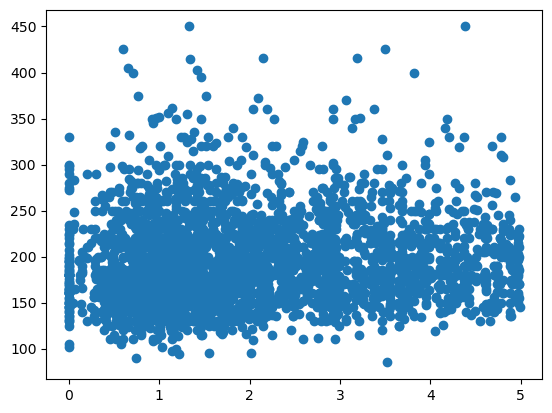

In [6]:
# load 'RIAGENDR', 'RIDAGEYR' in demo.csv
ind = load_indicators({
    'P_DEMO': ['RIAGENDR', 'RIDAGEYR'],
    'P_WHQ':['SEQN', 'WHD020'],
    'P_INQ':['SEQN', 'INDFMMPI']
})
ind = ind[
    (ind['RIAGENDR'] == 1) &
    (ind['RIDAGEYR'] >= 18)&
    (ind['WHD020'] <= 578)&
    (ind['INDFMMPI'] < 5)
]
weight = ind['WHD020']
income = ind['INDFMMPI']

plt.scatter(income, weight)
slope, intercept, r, p, std_err = stats.linregress(income, weight)
print(r)

### corelation between drinking frequency (P_ALQ.ALQ121) by blood pressure (P_WHQ.BPQ020) by Log Regression

In [7]:
ind = load_indicators({
    'P_ALQ':['ALQ121'],
    'P_BPQ':['BPQ020']
})
ind = ind[
    (ind['ALQ121'] > 0)&
    (ind['ALQ121'] <= 15)&
    ((ind['BPQ020'] == 1)|
    (ind['BPQ020'] == 2))
]
dfreq = ind[['ALQ121']]
hbp = ind['BPQ020']

logr = linear_model.LogisticRegression()
logr.fit(dfreq, hbp)
log_odds = logr.coef_
odds = np.exp(log_odds)

print(odds)

[[1.01380068]]


### insulin pmol/L and diabetes questionare

/var/folders/rv/ln6yxn1j42l343d40g31dgy00000gn/T/ipykernel_96877/2084751156.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(insulin, diabetes, vmin=0, vmax=100)


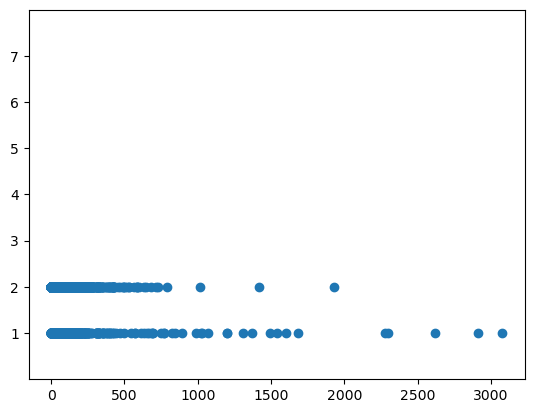

In [3]:
ind = load_indicators({
    'P_INS':['LBDINSI'],
    'P_DIQ':['DIQ010']
})
ind = ind[
    (ind['LBDINSI'].notna())&
    (ind['DIQ010'] == 1)|
    (ind['DIQ010'] == 2)
]
insulin = ind['LBDINSI']
diabetes = ind['DIQ010']

fig, ax = plt.subplots()
ax.scatter(insulin, diabetes, vmin=0, vmax=100)
ax.set(ylim=(0, 8), yticks=np.arange(1, 8))
plt.show()

# logr = linear_model.LogisticRegression()
# logr.fit(insulin, diabetes)
# log_odds = logr.coef_
# odds = numpy.exp(log_odds)

# print(odds)
# def logit2prob(logr, X):
#   log_odds = logr.coef_ * X + logr.intercept_
#   odds = numpy.exp(log_odds)
#   probability = odds / (1 + odds)
#   return(probability)

# print(logit2prob(logr, ind[['LBDINSI']]))

### cholesterol and cholesterol questionare

In [11]:
ind = load_indicators({
    'P_DEMO':['RIDAGEYR'],
    'P_TCHOL':['LBXTC'],
    'P_BPQ':['BPQ080']
})
ind = ind[
    ((ind['RIDAGEYR'] >= 50)&
    (ind['RIDAGEYR'] <= 80))&
    (ind['LBXTC'].notna())&
    ((ind['BPQ080'] == 1)|
    (ind['BPQ080'] == 2))
]
cho = ind[['LBXTC']]
ques = ind['BPQ080']

logr = linear_model.LogisticRegression()
logr.fit(cho, ques)
log_odds = logr.coef_
odds = np.exp(log_odds)

print(odds)
def logit2prob(logr, X):
  log_odds = logr.coef_ * X + logr.intercept_
  odds = np.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print(logit2prob(logr, ind[['LBXTC']]))

[[0.999483]]
         LBXTC
3     0.486428
5     0.469913
9     0.478681
11    0.477777
13    0.469784
...        ...
9439  0.470944
9440  0.473779
9441  0.474166
9443  0.479971
9444  0.477907

[4235 rows x 1 columns]
